# Investigating the Titanic

## Read csv into DataFrame object

In [70]:
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
#titanic_df['Pclass'].replace([1,2,3], ['First','Second','Third'], inplace=True)
#titanic_df.head()

## Checking for inaccuracies and missing values

In [72]:
# All passenger names are unique
len(titanic_df['Name'].unique()) == len(titanic_df)

True

In [73]:
# Print the columns for which every position contains a unique value
for pos in range(len(titanic_df.columns)):
    if len(titanic_df.iloc[:, pos].unique()) == len(titanic_df):
        print(titanic_df.dtypes.index[pos])

PassengerId
Name


In [74]:
# Print columns with any missing values
for pos in range(len(titanic_df.columns)):
    if titanic_df.iloc[:, pos].isnull().any():
        print(titanic_df.dtypes.index[pos])

Age
Cabin
Embarked


In [329]:
tickets = titanic_df['Ticket']
titanic_df[tickets.isin(tickets[tickets.duplicated()])].sort_values('Ticket').head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


## Survival rate by class

In [194]:
# Overall survival rate
rate = titanic_df['Survived'].sum() / len(titanic_df)
str(round(rate*100, 1)) + '%'

'38.4%'

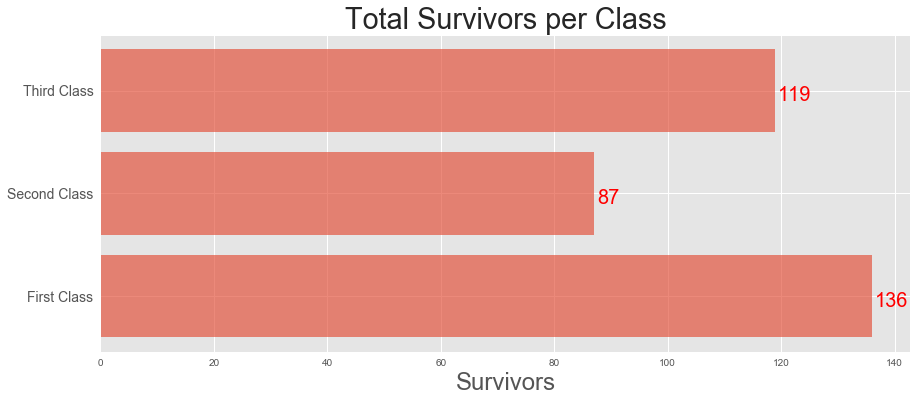

In [316]:
# Find the number of survivors by class
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.style.use('ggplot')

passengers_per_class_gb = titanic_df[['Pclass','Survived']].groupby('Pclass', as_index=False)
survivors_per_class_df = passengers_per_class_gb.sum()
#survivors_per_class_gb.sum().plot(kind='hist')
#plt.plot(survivors_per_class_gb.sum())

classes_ls = ['First Class','Second Class','Third Class']
#matplotlib.rcParams['figure.figsize'] = '18.0, 16.0'
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(6,4))
plt.barh(survivors_per_class_df['Pclass'], survivors_per_class_df['Survived'],
         align='center', alpha=0.65)
plt.yticks(survivors_per_class_df['Pclass'], classes_ls, fontsize=14)
plt.xlabel('Survivors')
plt.title('Total Survivors per Class')
for y, x in enumerate(survivors_per_class_df['Survived']):
    plt.text(x + .5, y + .9, str(x), color='red')
#plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.subplots_adjust(right=2, top=1, bottom=-.1)

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
#plt.title('Programming language usage')

In [317]:
list(enumerate(survivors_per_class_df['Survived']))

[(0, 136), (1, 87), (2, 119)]

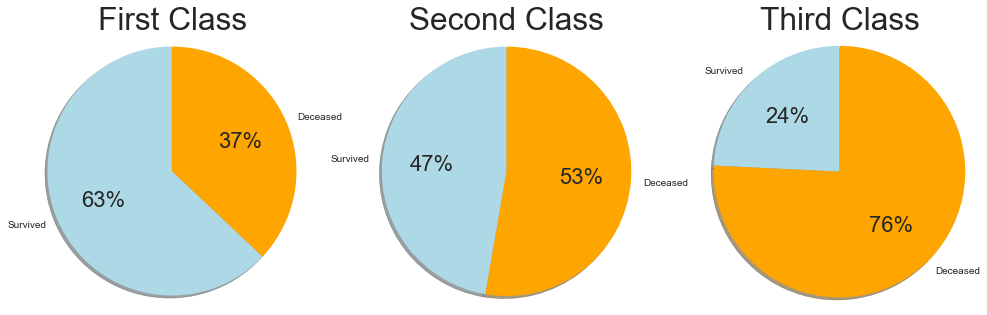

In [328]:
def get_survival_rate(classes):
    return classes.sum() / len(classes)

survival_rate_per_class_df = passengers_per_class_gb.apply(get_survival_rate)

labels = ['Survived','Deceased']
charts = [None]*3
fig = plt.figure(figsize=(7,5))

for i in range(len(charts)):
    rate = survival_rate_per_class_df['Survived'][i]
    charts[i] = fig.add_subplot(1,3,i+1)
    charts[i].pie([rate, 1-rate], labels=labels, autopct='%1.0f%%', shadow=True,
                  startangle=90, colors=['lightblue','orange'])
    charts[i].set_title(classes_ls[i])
    charts[i].axis('equal')
    
plt.subplots_adjust(right=2)

In [276]:
len(survival_rate_per_class_df['Survived'])

3